In [15]:
import sys
from pathlib import Path

# Add parent directory to sys.path
parent_dir = Path("..").resolve()
if str(parent_dir) not in sys.path:
    sys.path.insert(0, str(parent_dir))

# Now import your module
import importlib
import common_utils
importlib.reload(common_utils)

# Import specific functions
from common_utils import (
    get_unique_image_shapes,
    get_unique_image_paths,
    load_images_from_paths,
    build_image_dataframe,
    split_data,
    bin_ages,
    bin_ages_7
)


Check the shapes to see what we are working with and know how to handle the imput into the model later on

In [3]:
# unique_shapes = get_unique_image_shapes()
# for shape in unique_shapes:
#     print(shape)


In [4]:
paths=get_unique_image_paths()
len(paths)

9572

In [5]:
image_paths_csv=build_image_dataframe(paths)

In [6]:
image_paths_csv.head(5)

,path,age
0,../raw_data2/face_age/024/3949.png,24
1,../raw_data2/face_age/024/4767.png,24
2,../raw_data2/face_age/024/5445.png,24
3,../raw_data2/face_age/024/7520.png,24
4,../raw_data2/face_age/024/2128.png,24


In [11]:
image_paths_csv.age.value_counts().sort_index()

age
1      1101
2       471
3       280
4       257
5       175
       ... 
96       14
99        2
100       2
101       1
110       2
Name: count, Length: 99, dtype: int64

<Axes: xlabel='age'>

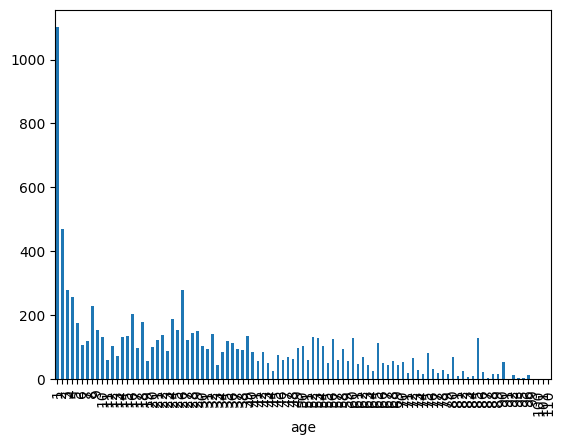

In [7]:
image_paths_csv.age.value_counts().sort_index().plot(kind='bar')

In [16]:
image_paths_csv=bin_ages(image_paths_csv)
image_paths_csv_7_classes=bin_ages_7(image_paths_csv)

<Axes: xlabel='age_bin_label'>

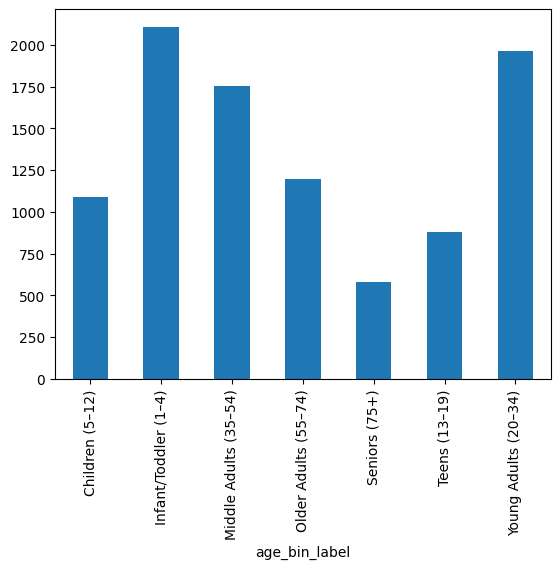

In [17]:
image_paths_csv_7_classes.age_bin_label.value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='age_bin_label'>

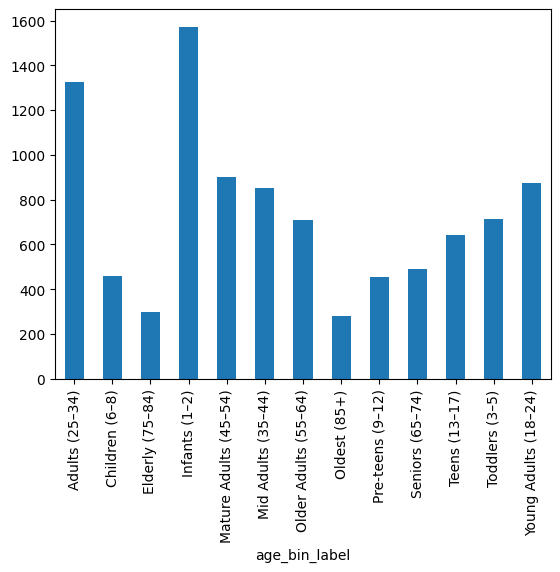

In [10]:
image_paths_csv.age_bin_label.value_counts().sort_index().plot(kind='bar')

In [8]:
image_paths_csv.head()

,path,age,age_bin,age_bin_label
0,../raw_data2/face_age/001/1000.png,1,0,Infants (1–2)
1,../raw_data2/face_age/001/1018.png,1,0,Infants (1–2)
2,../raw_data2/face_age/001/1030.png,1,0,Infants (1–2)
3,../raw_data2/face_age/001/1062.png,1,0,Infants (1–2)
4,../raw_data2/face_age/001/1068.png,1,0,Infants (1–2)


In [9]:
image_paths_csv.path

0       ../raw_data2/face_age/001/1000.png
1       ../raw_data2/face_age/001/1018.png
2       ../raw_data2/face_age/001/1030.png
3       ../raw_data2/face_age/001/1062.png
4       ../raw_data2/face_age/001/1068.png
                       ...                
9567    ../raw_data2/face_age/100/2694.png
9568    ../raw_data2/face_age/100/6408.png
9569    ../raw_data2/face_age/101/1554.png
9570    ../raw_data2/face_age/110/3906.png
9571    ../raw_data2/face_age/110/9628.png
Name: path, Length: 9572, dtype: object

In [18]:
import os
os.makedirs("./processed_data",exist_ok=True)

image_paths_csv.to_csv("./processed_data/image_paths.csv", index=False)
image_paths_csv_7_classes.to_csv("./processed_data/image_paths_7_classes.csv", index=False)

In [11]:
image_paths_csv.age_bin.value_counts().sort_index()

age_bin
0     1572
1      712
2      459
3      453
4      641
5      875
6     1325
7      854
8      901
9      710
10     489
11     299
12     282
Name: count, dtype: int64

In [12]:
paths_train_df, paths_val_df, paths_test_df = split_data(image_paths_csv)